# First Objective: "Grotrian diagram visualisation"

This is my solution to the first objective of the "Grotrian diagram visualisation".
[GSoC'23 ideas page](https://tardis-sn.github.io/gsoc_2023/ideas/)

In [1]:
# Download the atomic data
from tardis.io.atom_data.util import download_atom_data
download_atom_data('kurucz_cd23_chianti_H_He')


Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

In [ ]:
# Run simulation
from tardis import run_tardis
sim = run_tardis('tardis_example.yml', virtual_packet_logging=True, log_level='CRITICAL')

# Si ion density vs velocity

In [3]:
# Define Si constants
SI_ATOMIC_NUMBER = 14
SI_SYMBOL = 'Si'

In [4]:
# Extract ion densities
si_ion_densities = {}
si_ion_densities[0] = sim.plasma.ion_number_density.loc[SI_ATOMIC_NUMBER, 0]
si_ion_densities[1] = sim.plasma.ion_number_density.loc[SI_ATOMIC_NUMBER, 1]

In [5]:
# Combined densities of all silicon ions (Used to normalize individual ion densities)
total_si_densities = sim.plasma.ion_number_density.loc[SI_ATOMIC_NUMBER].sum(axis=0)

In [6]:
# Get middle velocities
middle_velocities = sim.model.v_middle.si / 1000 # scale down by 1000 for km/s

In [7]:
ions_to_plot = [
    {
        "charge": 0,
        "label": "Neutral Si"
    },
    {
        "charge": 1,
        "label": "Singly Charged Si"
    }
]

# Plotly Plots

In [12]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

# Set custom text for hover tooltip
text = [f'Shell no.: {i}' for i in range(len(middle_velocities))]
hovertemplate = 'Ion charge: 0<br>Velocity: %{x:.0f}<br>Density: %{y}<br>%{text}'

# Add plots for each ion
for ion_info in ions_to_plot:
    fig.add_trace(go.Scatter(x=middle_velocities, y=si_ion_densities[ion_info["charge"]] / total_si_densities,
                             name=ion_info["label"],
                             line_shape='hvh', hovertemplate=hovertemplate, text=text))

# Update fig layout and metadata
fig.update_yaxes(type="log", exponentformat="power", title="Ion Density")
fig.update_xaxes(exponentformat="none", title="Velocity (km/s)")
fig.update_traces(mode="lines+markers")
fig.update_layout(title_text="Si Fractional Ion Density vs Velocity", title_x=0.5,
                  legend=dict(y=0.5, traceorder="reversed", font_size=16))

fig.show()

# # Only uncomment if you want to render image on github/nbviewer
# import plotly.io as pio
# png_renderer = pio.renderers["png"]
# png_renderer.width = 1500
# png_renderer.height = 700
# fig.show("png")

# Matplotlib Plots

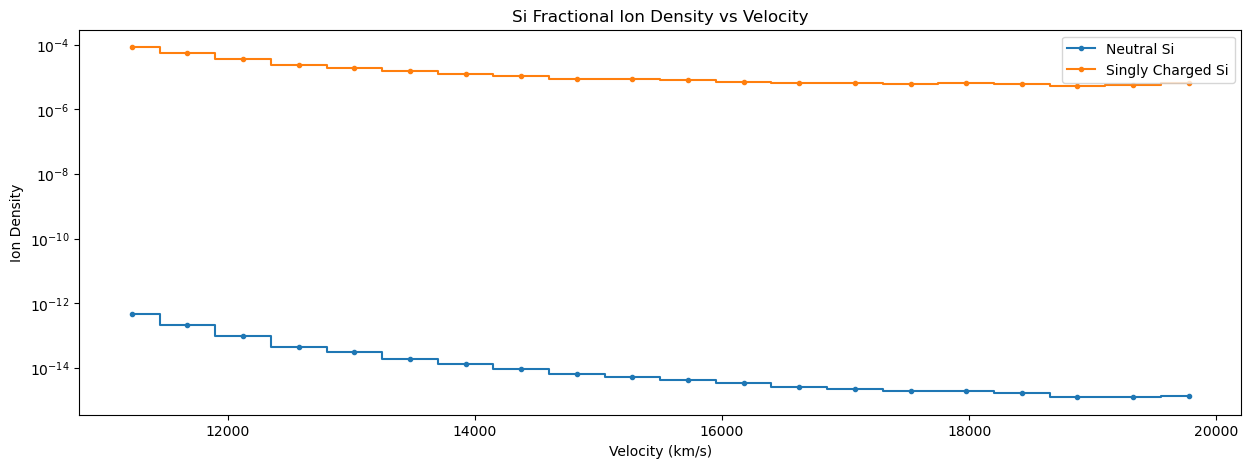

In [9]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 5)
plt.yscale("log")

plot_kwargs = dict(marker=".", where="mid")

for ion_info in ions_to_plot:
    plt.step(middle_velocities, si_ion_densities[ion_info["charge"]] / total_si_densities,
             label=ion_info["label"], **plot_kwargs)

plt.title("Si Fractional Ion Density vs Velocity")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Ion Density")

plt.legend()